In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [249]:
d1 = 36.71
f2 = 87.31
a5 = 880

def wave(f, t):
    return np.sin(2 * np.pi * f * t)

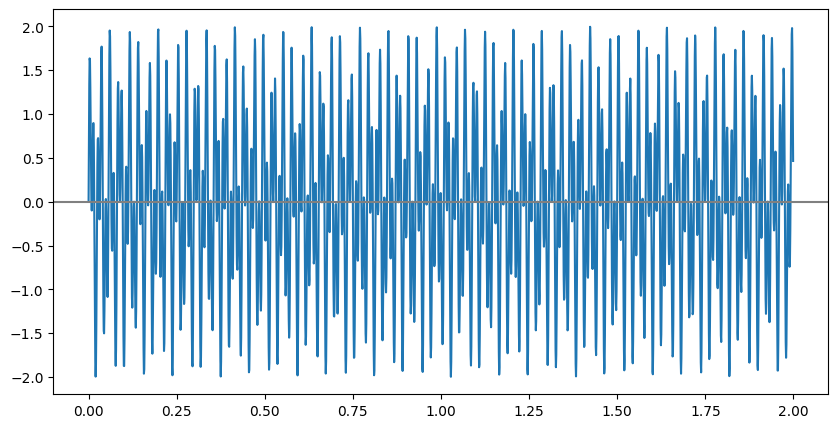

In [139]:
x = np.arange(0, 2, 0.001)
y = wave(d1, x) + wave(f2, x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y)
ax.axhline(0, c="grey")

In [295]:
from itertools import pairwise

def fourier_transform(amplitudes, times, frequencies):
    scale = 1 / (times[-1] - times[0])
    integral = 0
    time_step = times[1] - times[0] # assuming constant time step
    # values = np.array([])
    # for frequency in frequencies:
    dots = amplitudes * 1j * np.exp(-2 * np.pi * frequencies[:, np.newaxis] * 1j * times[np.newaxis,:])
    integral = dots.sum(axis=1) * time_step
    return integral.real

In [311]:
import scipy

def fourier_transform(amplitudes, times, frequencies):
    scale = 1 / (times[-1] - times[0])
    integral = 0
    time_step = times[1] - times[0] # assuming constant time step
    # values = np.array([])
    gaus = scipy.signal.windows.gaussian(len(times), 0.3 * (times[-1] - times[0]))
    dots = amplitudes * 1j * np.exp(-2 * np.pi * frequencies[:, np.newaxis] * 1j * times[np.newaxis,:] * gaus[np.newaxis, :])
    integral = dots.sum(axis=1) * time_step
    return integral.real

C:\Users\georg\AppData\Local\Temp\ipykernel_27356\1883486834.py:8: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaus = scipy.signal.gaussian(len(times), 0.3 * (times[-1] - times[0]))


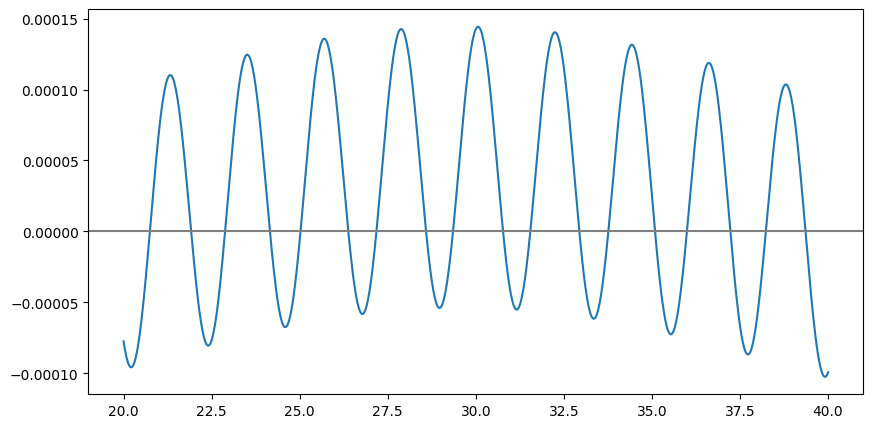

In [312]:
freq = np.linspace(20, 40, 1000)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(freq, fourier_transform(y, x, freq))
ax.axhline(0, c="grey")

In [297]:
# notes are log_12(2) spaced
a_4 = 440

geom_spacing = 2 ** (1 / 12)
note_freq = np.array([a_4 * (geom_spacing ** i) for i in range(-44, 27)])

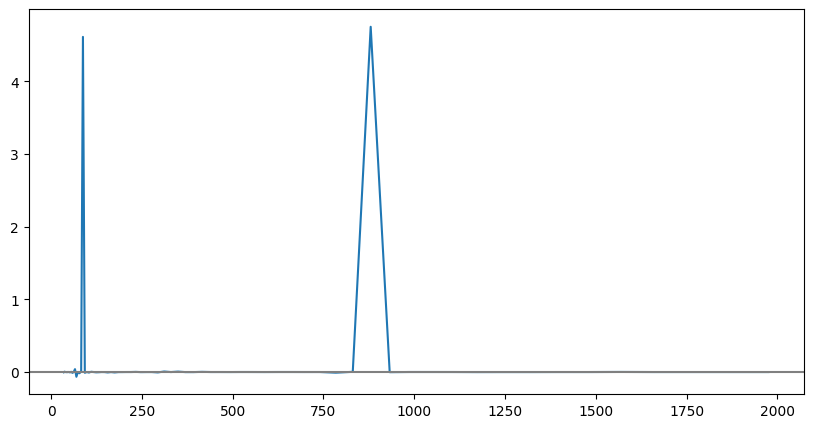

In [298]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(note_freq, fourier_transform(y, x, note_freq))
ax.axhline(0, c="grey")

In [307]:
x = []
y = []

last_cycle = 0
cycle_length = 0.4
for dur in range(1, 7):
    on = dur * 0.05 # time on in seconds
    x_cycle = np.arange(last_cycle, last_cycle + cycle_length, 0.0001)
    x = np.hstack((x, x_cycle))
    y = np.hstack((y, np.where(x_cycle < last_cycle + on, wave(f2, x_cycle) + wave(a5, x_cycle), np.zeros(len(x_cycle)))))
    last_cycle += cycle_length

In [308]:
window_width_half = 300 # number of samples in each window
amplitudes = np.zeros((len(note_freq)))
for i in range(window_width_half, len(x) - window_width_half):
    i_1 = i - window_width_half
    i_2 = i + window_width_half
    a = fourier_transform(y[i_1:i_2], x[i_1:i_2], note_freq)
    a_filtered = np.where(a > 0.0002, a, 0)
    amplitudes = np.vstack((amplitudes, a_filtered))

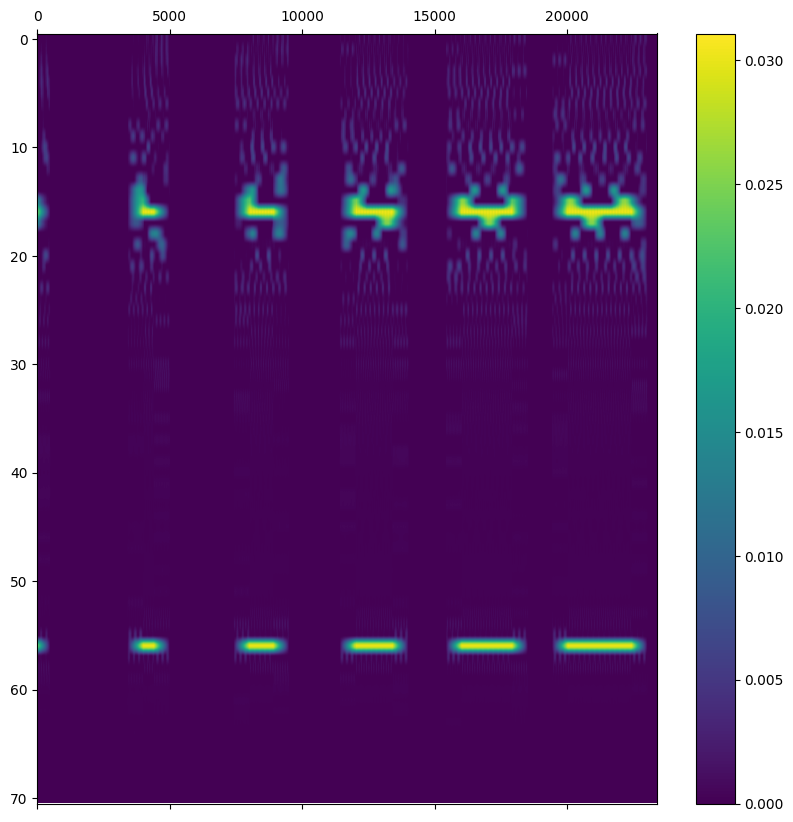

In [309]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
plt.matshow(amplitudes.T, aspect="auto", interpolation=None, fignum=0)
plt.colorbar()

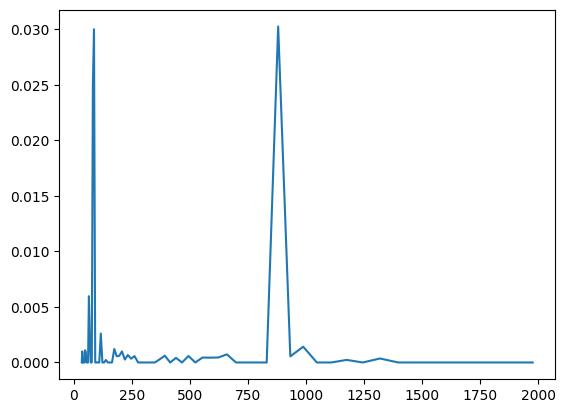

In [310]:
plt.plot(note_freq, amplitudes[20020])